In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_loan_data = pd.read_csv('loan.csv',low_memory=False)
pd.set_option('display.max_columns', None)
raw_loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleaning

> Finding Missing Values Percentage, and try to take a informed decision of removing columns 

In [3]:
missing_percentage_dict = round((raw_loan_data.isnull().sum() * 100/ len(raw_loan_data)),2).sort_values(ascending=False).to_dict()
missing_percentage_dict

{'verification_status_joint': 100.0,
 'annual_inc_joint': 100.0,
 'mo_sin_old_rev_tl_op': 100.0,
 'mo_sin_old_il_acct': 100.0,
 'bc_util': 100.0,
 'bc_open_to_buy': 100.0,
 'avg_cur_bal': 100.0,
 'acc_open_past_24mths': 100.0,
 'inq_last_12m': 100.0,
 'total_cu_tl': 100.0,
 'inq_fi': 100.0,
 'total_rev_hi_lim': 100.0,
 'all_util': 100.0,
 'max_bal_bc': 100.0,
 'open_rv_24m': 100.0,
 'open_rv_12m': 100.0,
 'il_util': 100.0,
 'total_bal_il': 100.0,
 'mths_since_rcnt_il': 100.0,
 'open_il_24m': 100.0,
 'open_il_12m': 100.0,
 'open_il_6m': 100.0,
 'open_acc_6m': 100.0,
 'tot_cur_bal': 100.0,
 'tot_coll_amt': 100.0,
 'mo_sin_rcnt_rev_tl_op': 100.0,
 'mo_sin_rcnt_tl': 100.0,
 'mort_acc': 100.0,
 'num_rev_tl_bal_gt_0': 100.0,
 'total_bc_limit': 100.0,
 'total_bal_ex_mort': 100.0,
 'tot_hi_cred_lim': 100.0,
 'percent_bc_gt_75': 100.0,
 'pct_tl_nvr_dlq': 100.0,
 'num_tl_op_past_12m': 100.0,
 'num_tl_90g_dpd_24m': 100.0,
 'num_tl_30dpd': 100.0,
 'num_tl_120dpd_2m': 100.0,
 'num_sats': 100.0,
 'n

> After Analyzing the Missing Percentage of values, taken a decision to remove all columns whose null values are more than 30 %. 

In [4]:
threshold= 0.7 * len(raw_loan_data)
#Keep only the rows with at least 70% of non-NA values.
loan_df_after_nullColRemovals = raw_loan_data.dropna(thresh=threshold,axis=1)

> For First time loan applicants, lot of post loan variables does not apply. So we can remove those categorical/behaviorial variables.

In [5]:

list_behaviorial_columns= ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc',
'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','pub_rec_bankruptcies']
loan_df_after_behaviorial_colRemovals = loan_df_after_nullColRemovals.drop(columns= list_behaviorial_columns, axis= 1)
loan_df_after_behaviorial_colRemovals

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,f,0.0,1,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,f,0.0,1,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,f,0.0,1,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,f,0.0,1,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,f,0.0,1,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,f,NaN,1,0,NaN,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,f,NaN,1,0,NaN,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,f,NaN,1,0,NaN,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,f,NaN,1,0,NaN,0,NaN


> Find and Remove columns which are having only one value across all data/rows, as they are not useful in our analysis

In [6]:
singleVal_col_List = []
unique_val_dict = loan_df_after_behaviorial_colRemovals.nunique().sort_values().to_dict()
for key,val in unique_val_dict.items():
    if val == 1 :
        singleVal_col_List.append(key)

loan_df_after_SingleValCol_Removal = loan_df_after_behaviorial_colRemovals.drop(singleVal_col_List,axis=1)
loan_df_after_SingleValCol_Removal

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72


> Remove Un-useful Columns
>> 1. id, member_id : As these are not useful as they are unique Id which helps to identify specific customer, not useful for our analysis
>> 2. URL : This col is also unique for each customer, not useful for our analysis
>> 3. emp_title, title : This cols are plain text, and have more unique values. So we cannot infer much information from theses cols. 
>> 4. zip_code: last 2 digits of value is masked and we cannot infer much from this column.

In [7]:
un_useful_col_list = ['id','member_id','url','title','emp_title','zip_code']
loan_df_after_unuseful_col_removal = loan_df_after_SingleValCol_Removal.drop(un_useful_col_list,axis=1)
loan_df_after_unuseful_col_removal


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72


## Data Filtering / Row Cleaning
> -  As we want to find out deafulted loans, so we need not consider Current laons(loan_status)

In [8]:
filtered_df = loan_df_after_unuseful_col_removal[loan_df_after_unuseful_col_removal.loan_status != 'Current']

> - In home_ownership column we have 3 rows with value 'NONE' and moreover loan_status of these data/rows is FullyPaid. So removing those rows

In [9]:
filtered_df = filtered_df[filtered_df.home_ownership != 'NONE']

- In Annual_inc column we see some outlier values, so trying to normalize by only considering 95 percentile of data

In [10]:
filtered_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     58860.28
0.75     82000.00
0.90    115000.00
0.95    140004.00
0.97    165000.00
0.98    187000.00
0.99    234162.00
Name: annual_inc, dtype: float64

In [11]:
p95_annual_inc_val = filtered_df['annual_inc'].quantile(0.95)
filtered_df = filtered_df[filtered_df.annual_inc <= p95_annual_inc_val ]
filtered_df.shape

(36651, 17)

# Standardize Data & Create New Categorical and inferenced Columns


-   emp_length column has null values, would like to fill null values with -1, as emp_length speaks about employee duration in an org, so dont want to take an mean/ median / mode of the column

In [12]:
filtered_df.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1014
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [13]:
filtered_df.emp_length.fillna('-1 years',inplace=True)
filtered_df.emp_length = filtered_df.emp_length.apply(lambda val: int(0 if "<" in val else (val.split('+')[0] if "+" in val else val.split()[0])))
filtered_df['emp_length'].unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7, -1])

- int_rate column : convert that to numeric column for analysis

In [14]:
filtered_df.int_rate = pd.to_numeric(filtered_df.int_rate.str.strip("%"))

- term column: create a new col, term_in_months and drop term col.

In [15]:
filtered_df['term_in_months'] = pd.to_numeric(filtered_df.term.apply(lambda val: val[1:3]))
filtered_df = filtered_df.drop(['term'],axis=1)

- issue_d column: extract loan issued month and year into seperate columns from issue_d (loan issued date)column.

In [16]:
filtered_df['issue_mon']=filtered_df.issue_d.str.partition("-", True)[0]
filtered_df.issue_d=pd.to_datetime(filtered_df.issue_d, format='%b-%y')
filtered_df['issue_year']=pd.DatetimeIndex(filtered_df['issue_d']).year
filtered_df = filtered_df.drop(columns=['issue_d'],axis=1)


- Sub_Grade Column: As we already have grade column we can convert the sub_grade column to numerical column for better analysis

In [17]:
filtered_df.sub_grade = pd.to_numeric(filtered_df.sub_grade.apply(lambda val: val[1:]))

- <span style="color:green">**New Column (installment_percentage_on_montly_Income): This col determines how much percentage of monthly income goes to loan installment**</span>

In [18]:
filtered_df['installment_percentage_on_montly_Income'] = round((filtered_df.installment / (filtered_df.annual_inc / 12)) * 100)

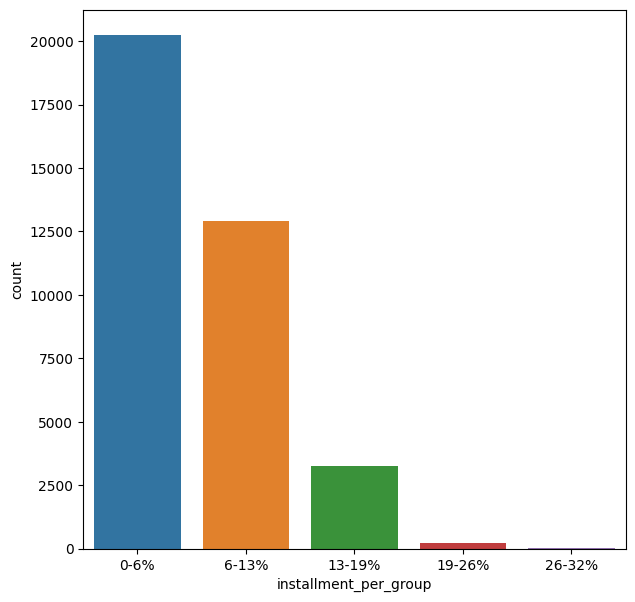

In [19]:
fig, ax = plt.subplots(figsize = (7,7))
filtered_df['installment_per_group'] = pd.cut(filtered_df.installment_percentage_on_montly_Income, bins=5,precision =0, labels=['0-6%','6-13%','13-19%','19-26%','26-32%'])
sns.countplot(x ='installment_per_group', data = filtered_df)
plt.show()


- int_rate , annual_inc columns: We can create categorical columns from these two columns, by using pd.cut and distrubution plots we can infer number of bins.

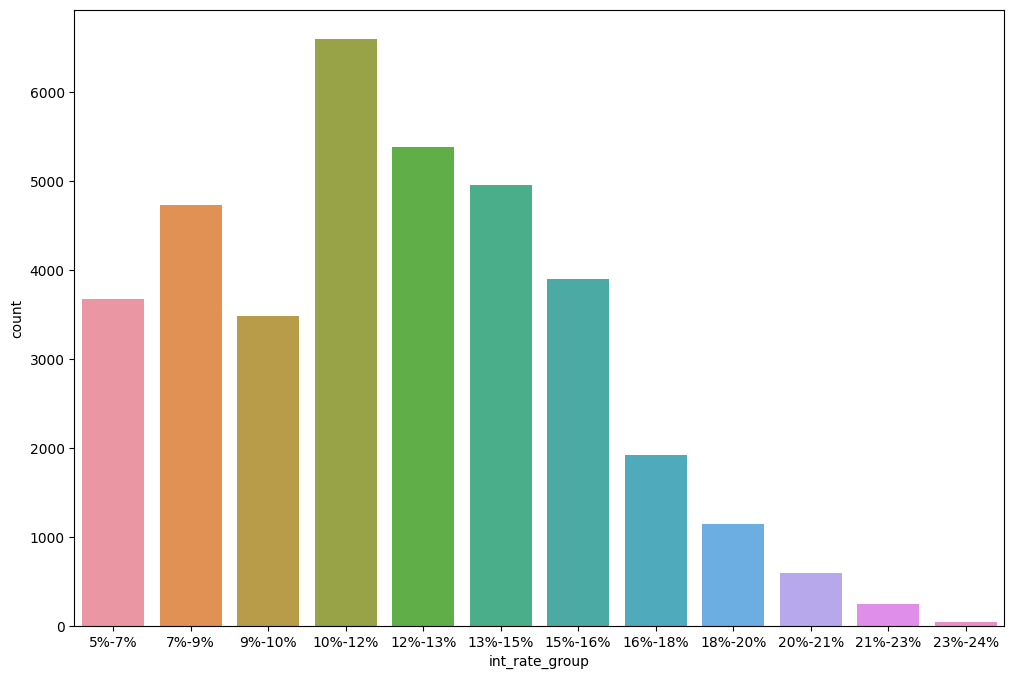

In [20]:
fig, ax = plt.subplots(figsize = (12,8))
filtered_df['int_rate_group'] = pd.cut(filtered_df.int_rate, bins=12,precision =0 , labels = ['5%-7%','7%-9%','9%-10%','10%-12%','12%-13%','13%-15%','15%-16%','16%-18%','18%-20%','20%-21%','21%-23%','23%-24%'])
sns.countplot(x ='int_rate_group', data = filtered_df)
plt.show()


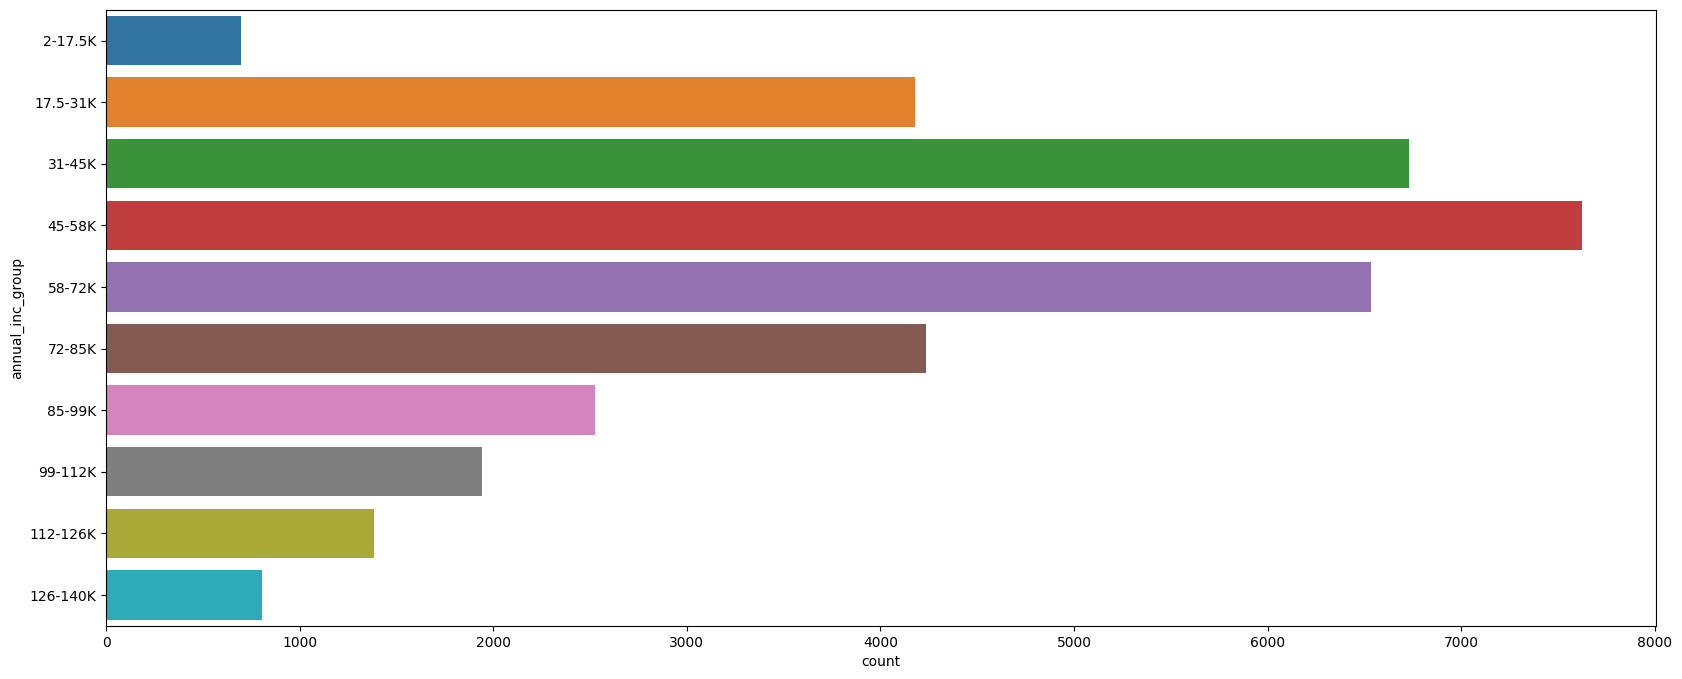

In [21]:
fig, ax = plt.subplots(figsize = (20,8))
filtered_df['annual_inc_group'] = pd.cut(filtered_df.annual_inc, bins=10,precision =0, labels=['2-17.5K','17.5-31K','31-45K','45-58K','58-72K','72-85K','85-99K','99-112K','112-126K','126-140K'])
sns.countplot(y ='annual_inc_group', data = filtered_df)
plt.show()



- dti_group col : new column dervied from dti(debt to income) col

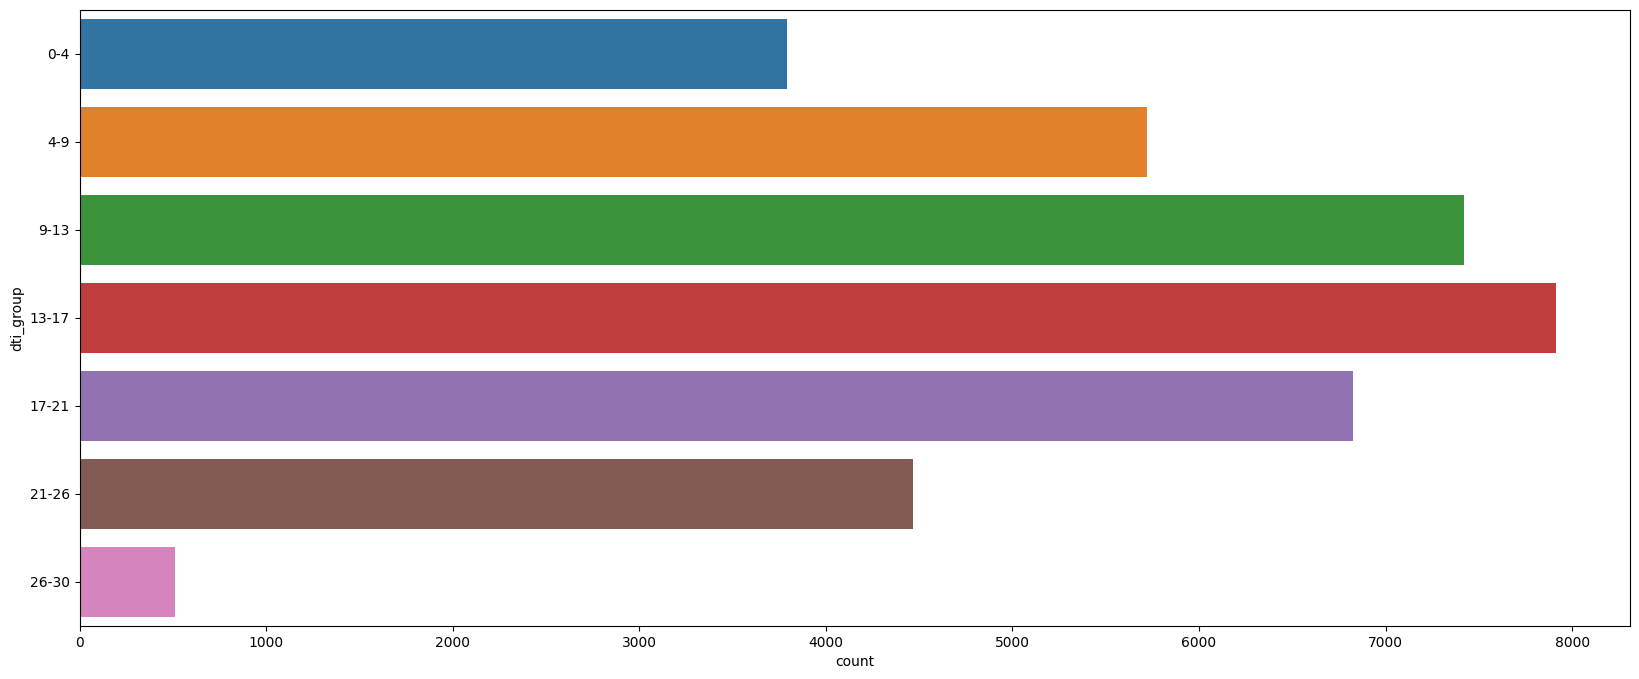

In [22]:
fig, ax = plt.subplots(figsize = (20,8))
filtered_df['dti_group'] = pd.cut(filtered_df.dti, bins=7,precision =0,labels=['0-4','4-9','9-13','13-17','17-21','21-26','26-30'] )
sns.countplot(y ='dti_group', data = filtered_df)
plt.show()



- #### **Split down Loan Data into charged_off_loan_df , fully_paid_loan_df for better analysis**

In [23]:
final_loan_df = filtered_df
final_loan_df.shape


(36651, 23)

In [24]:
charged_off_loan_df = final_loan_df[final_loan_df.loan_status == 'Charged Off']
charged_off_loan_df.shape

(5418, 23)

In [25]:
fully_paid_loan_df = final_loan_df[final_loan_df.loan_status == 'Fully Paid']
fully_paid_loan_df.shape

(31233, 23)

### **Data Validations done...**
- final_loan_df[final_loan_df.funded_amnt < final_loan_df.funded_amnt_inv]
- final_loan_df[final_loan_df.loan_amount < final_loan_df.funded_amnt_inv]

# Data Analysis using Visualizations

- ## __Univariate Analysis on Defaulted(Charged Off)loans & Fully paid Loans__

-  __Employee Length impact on loans__

Text(0.5, 1.0, 'Employee Length impact on Defaulted Loans')

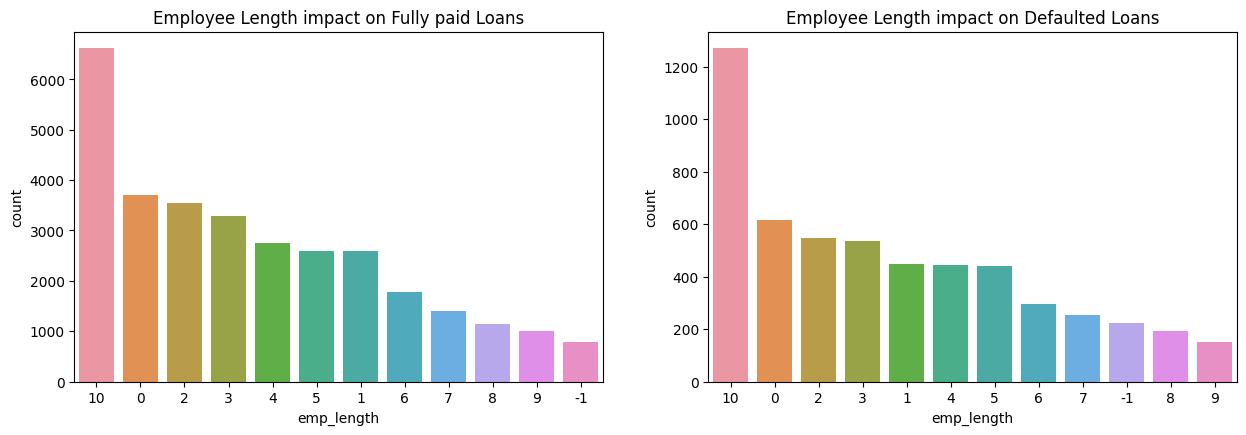

In [26]:
fig, ax = plt.subplots(figsize = (15,10))

plt.subplot(221)
sns.countplot(x='emp_length', data=fully_paid_loan_df , order=fully_paid_loan_df.emp_length.value_counts().index )
plt.title('Employee Length impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='emp_length', data=charged_off_loan_df , order=charged_off_loan_df.emp_length.value_counts().index)
plt.title('Employee Length impact on Defaulted Loans')

-  __Home Ownership impact on loans__

Text(0.5, 1.0, 'Home Ownership impact on Defaulted Loans')

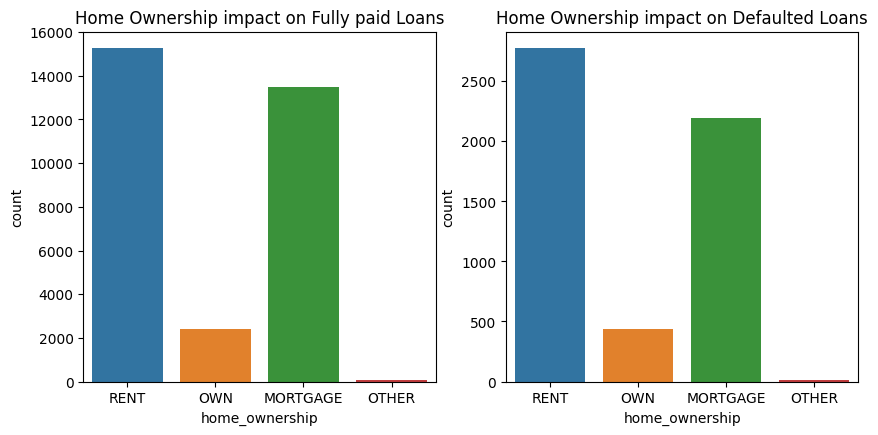

In [27]:
fig, ax = plt.subplots(figsize = (10,10))

plt.subplot(221)
sns.countplot(x='home_ownership', data=fully_paid_loan_df)
plt.title('Home Ownership impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='home_ownership', data=charged_off_loan_df)
plt.title('Home Ownership impact on Defaulted Loans')

-  __Purpose of Loan impact on loans__

Text(0.5, 1.0, 'Purpose of Loan impact on Defaulted Loans')

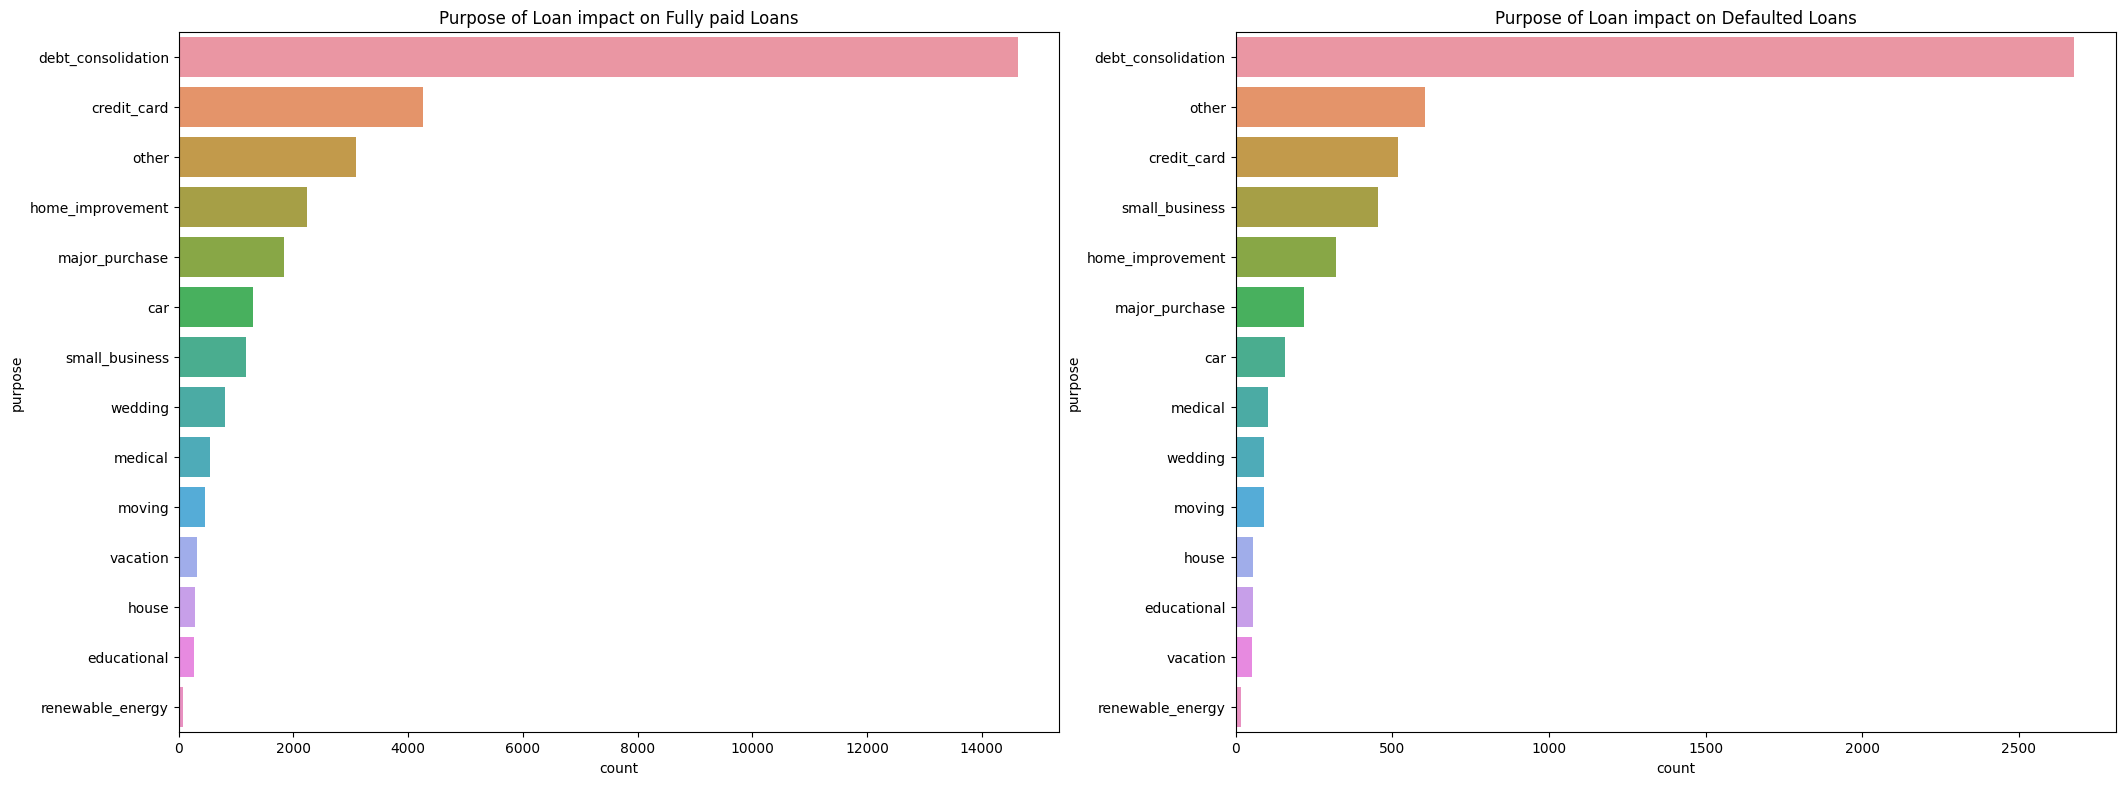

In [28]:
fig, ax = plt.subplots(figsize = (25,20))

plt.subplot(221)
sns.countplot(y='purpose', data=fully_paid_loan_df, order=fully_paid_loan_df.purpose.value_counts().index)
plt.title('Purpose of Loan impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(y='purpose', data=charged_off_loan_df,  order=charged_off_loan_df.purpose.value_counts().index)
plt.title('Purpose of Loan impact on Defaulted Loans')

-  __Annual Income impact on loans__

Text(0.5, 1.0, 'Annual Income impact on Defaulted Loans')

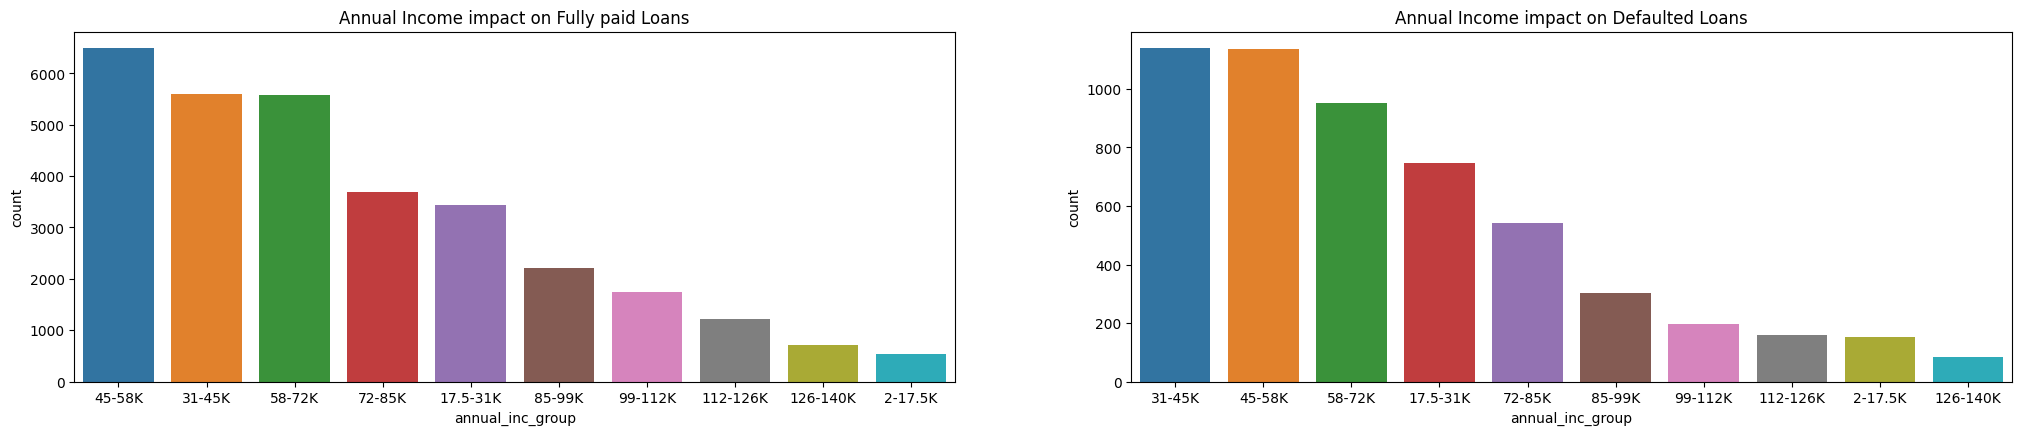

In [29]:
fig, ax = plt.subplots(figsize = (25,10))

plt.subplot(221)
sns.countplot(x='annual_inc_group', data=fully_paid_loan_df , order=fully_paid_loan_df.annual_inc_group.value_counts().index )
plt.title('Annual Income impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='annual_inc_group', data=charged_off_loan_df , order=charged_off_loan_df.annual_inc_group.value_counts().index)
plt.title('Annual Income impact on Defaulted Loans')

-  __Intrest rate impact on loans__

Text(0.5, 1.0, 'Intrest rate impact on Defaulted Loans')

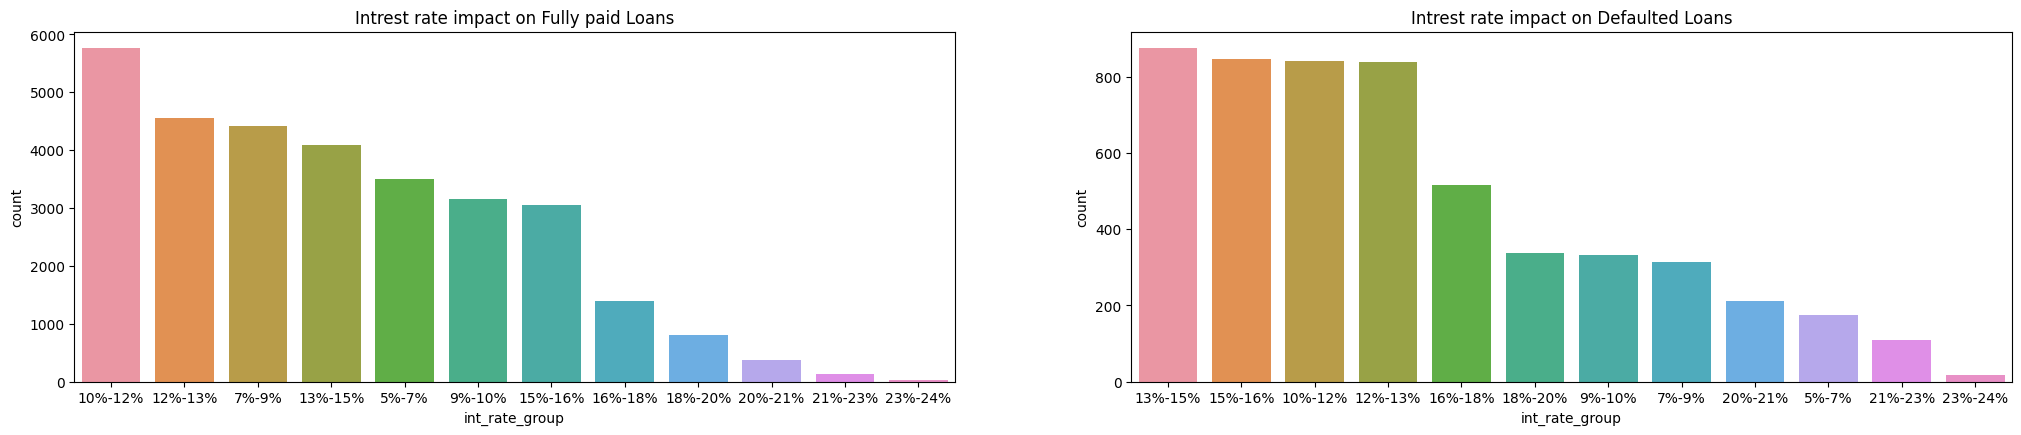

In [30]:
fig, ax = plt.subplots(figsize = (25,10))

plt.subplot(221)
sns.countplot(x='int_rate_group', data=fully_paid_loan_df , order=fully_paid_loan_df.int_rate_group.value_counts().index )
plt.title('Intrest rate impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='int_rate_group', data=charged_off_loan_df , order=charged_off_loan_df.int_rate_group.value_counts().index)
plt.title('Intrest rate impact on Defaulted Loans')

-  __Loan issue month impact on loans__

Text(0.5, 1.0, 'Loan issue month impact on Defaulted Loans')

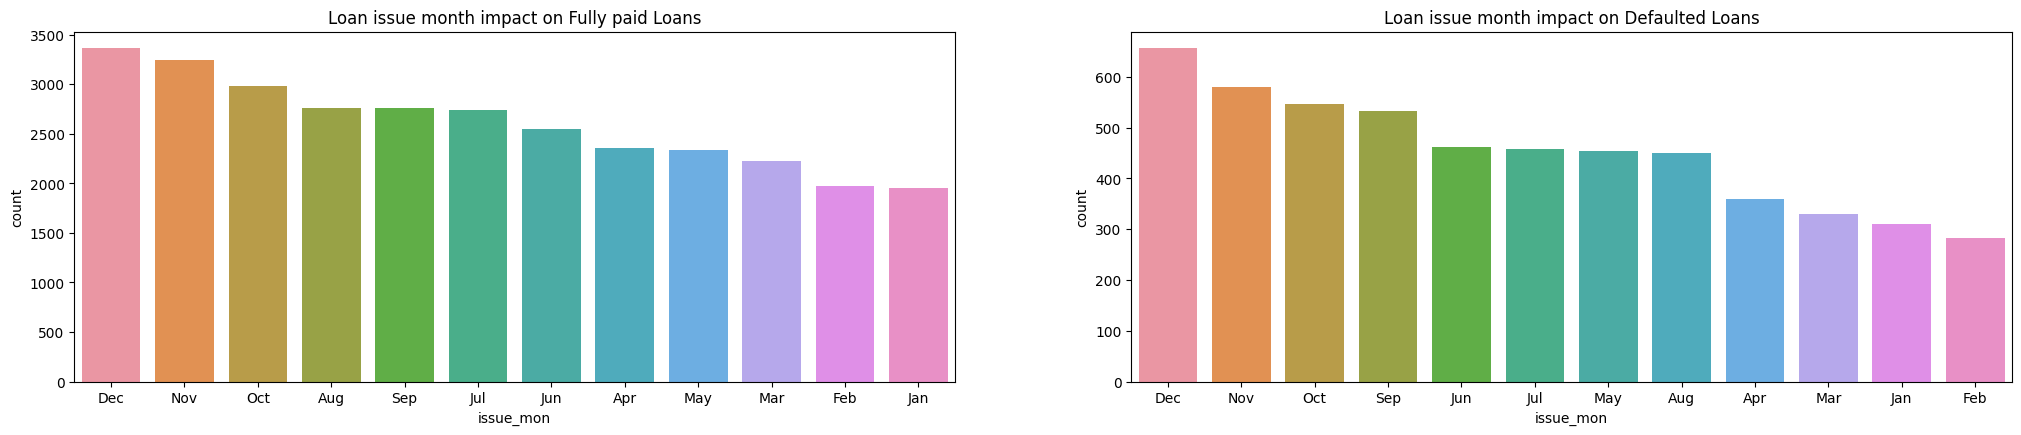

In [31]:
fig, ax = plt.subplots(figsize = (25,10))

plt.subplot(221)
sns.countplot(x='issue_mon', data=fully_paid_loan_df , order=fully_paid_loan_df.issue_mon.value_counts().index )
plt.title('Loan issue month impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='issue_mon', data=charged_off_loan_df , order=charged_off_loan_df.issue_mon.value_counts().index)
plt.title('Loan issue month impact on Defaulted Loans')

-  __Loan issue year impact on loans__

Text(0.5, 1.0, 'Loan issue year impact on Defaulted Loans')

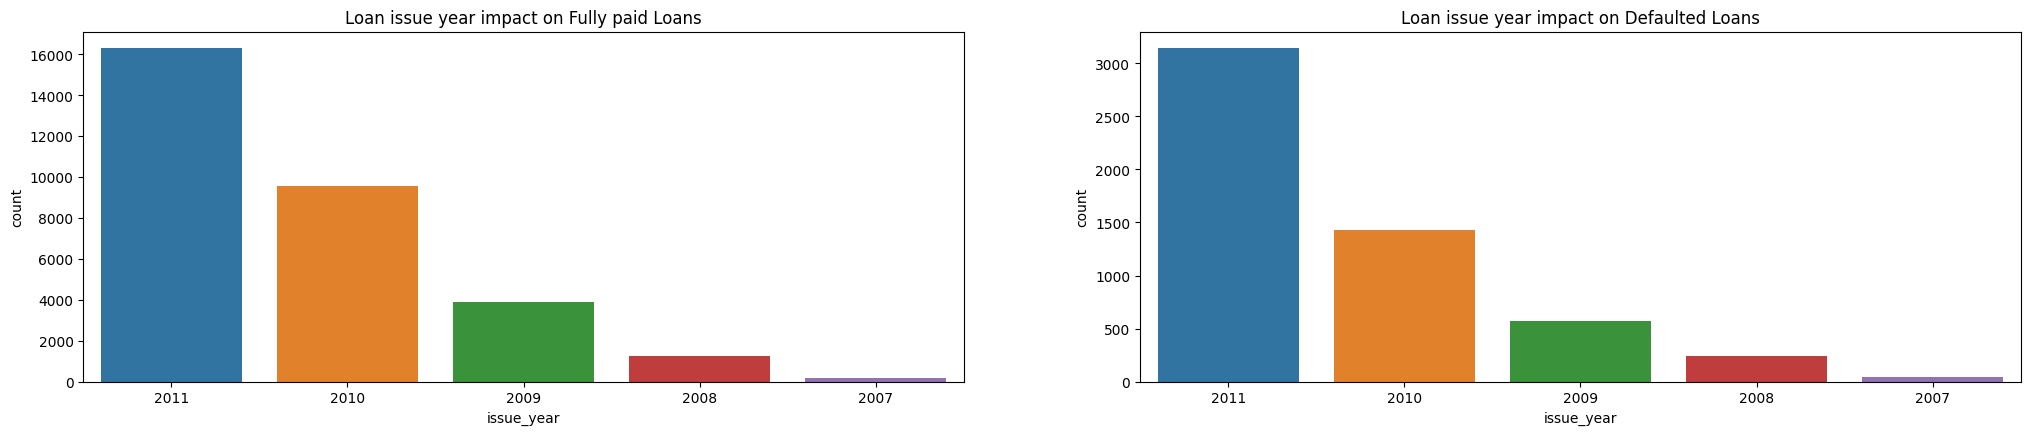

In [32]:
fig, ax = plt.subplots(figsize = (25,10))

plt.subplot(221)
sns.countplot(x='issue_year', data=fully_paid_loan_df , order=fully_paid_loan_df.issue_year.value_counts().index )
plt.title('Loan issue year impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='issue_year', data=charged_off_loan_df , order=charged_off_loan_df.issue_year.value_counts().index)
plt.title('Loan issue year impact on Defaulted Loans')

-  __Address State impact on loans__

Text(0.5, 1.0, 'Address State impact on Defaulted Loans')

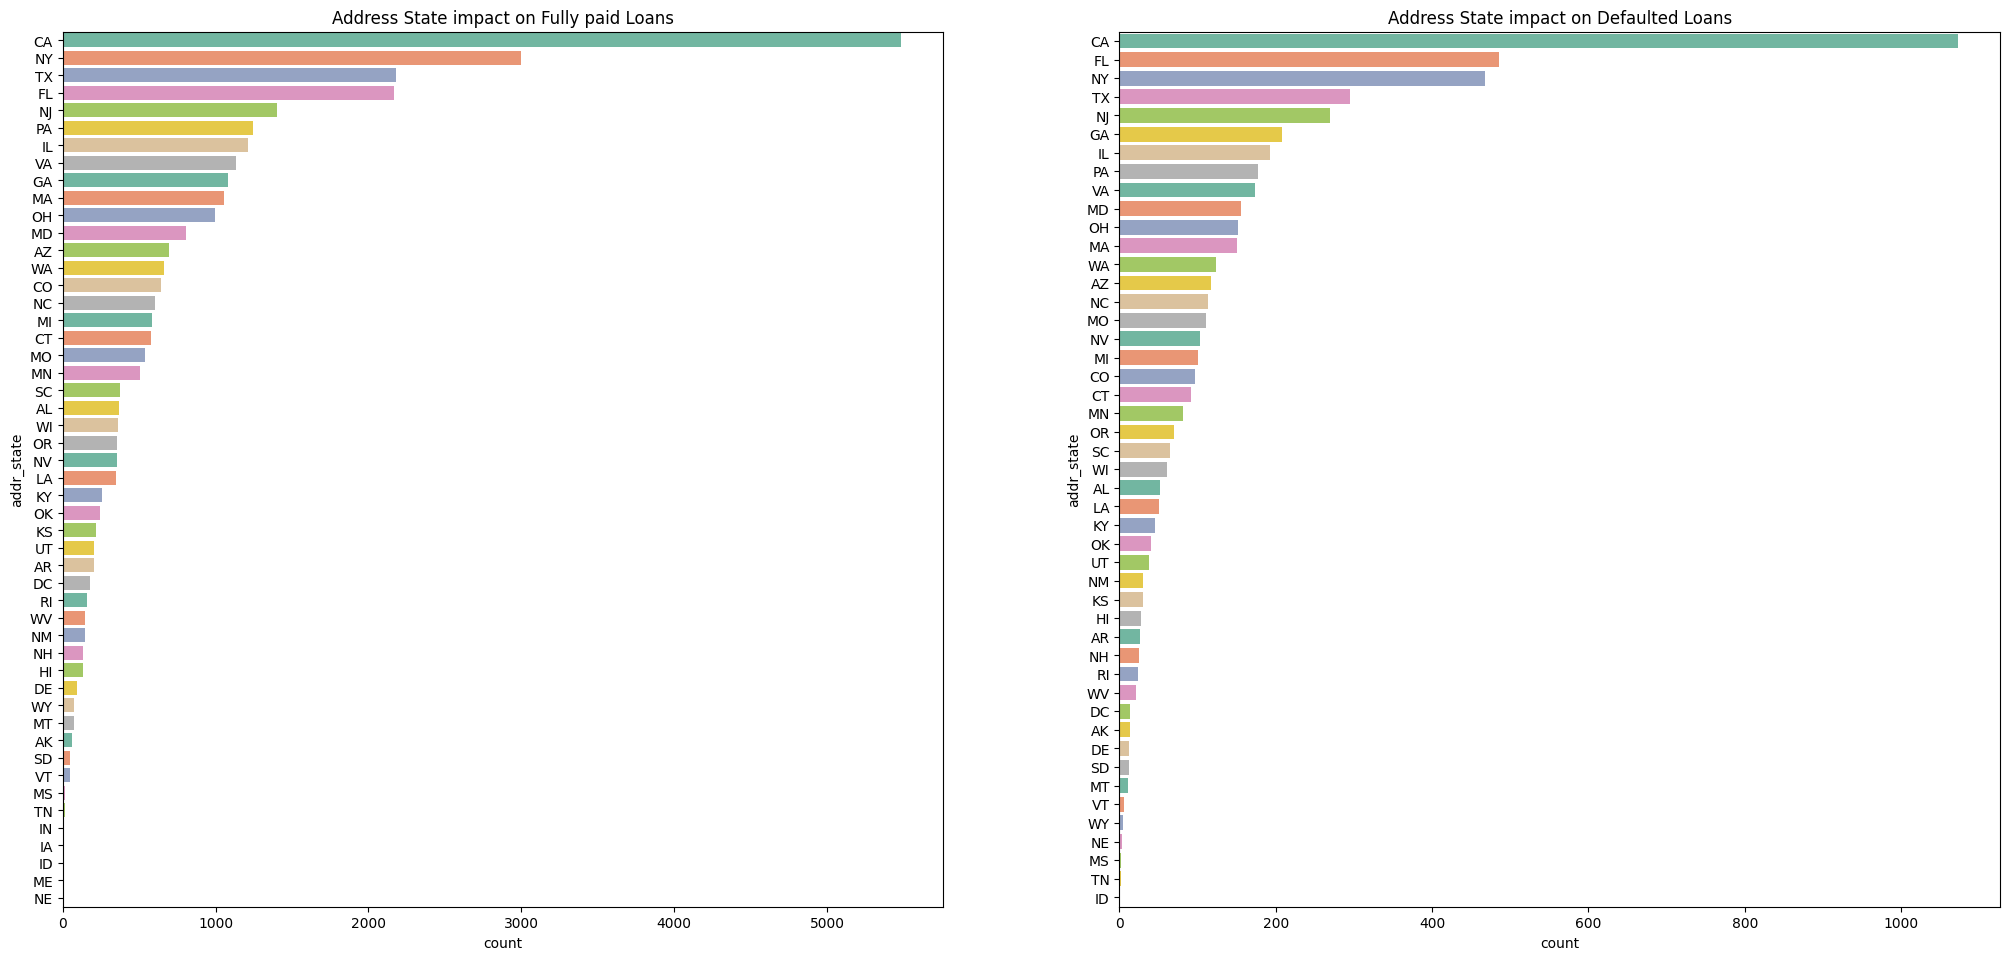

In [33]:
fig, ax = plt.subplots(figsize = (25,25))

plt.subplot(221)
sns.countplot(y='addr_state', data=fully_paid_loan_df , order=fully_paid_loan_df.addr_state.value_counts().index ,palette='Set2')
plt.title('Address State impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(y='addr_state', data=charged_off_loan_df , order=charged_off_loan_df.addr_state.value_counts().index ,palette='Set2')
plt.title('Address State impact on Defaulted Loans')

-  __Grade & Sub Grade impact on loans__

Text(0.5, 1.0, 'Grade & Sub Grade  impact on Defaulted Loans')

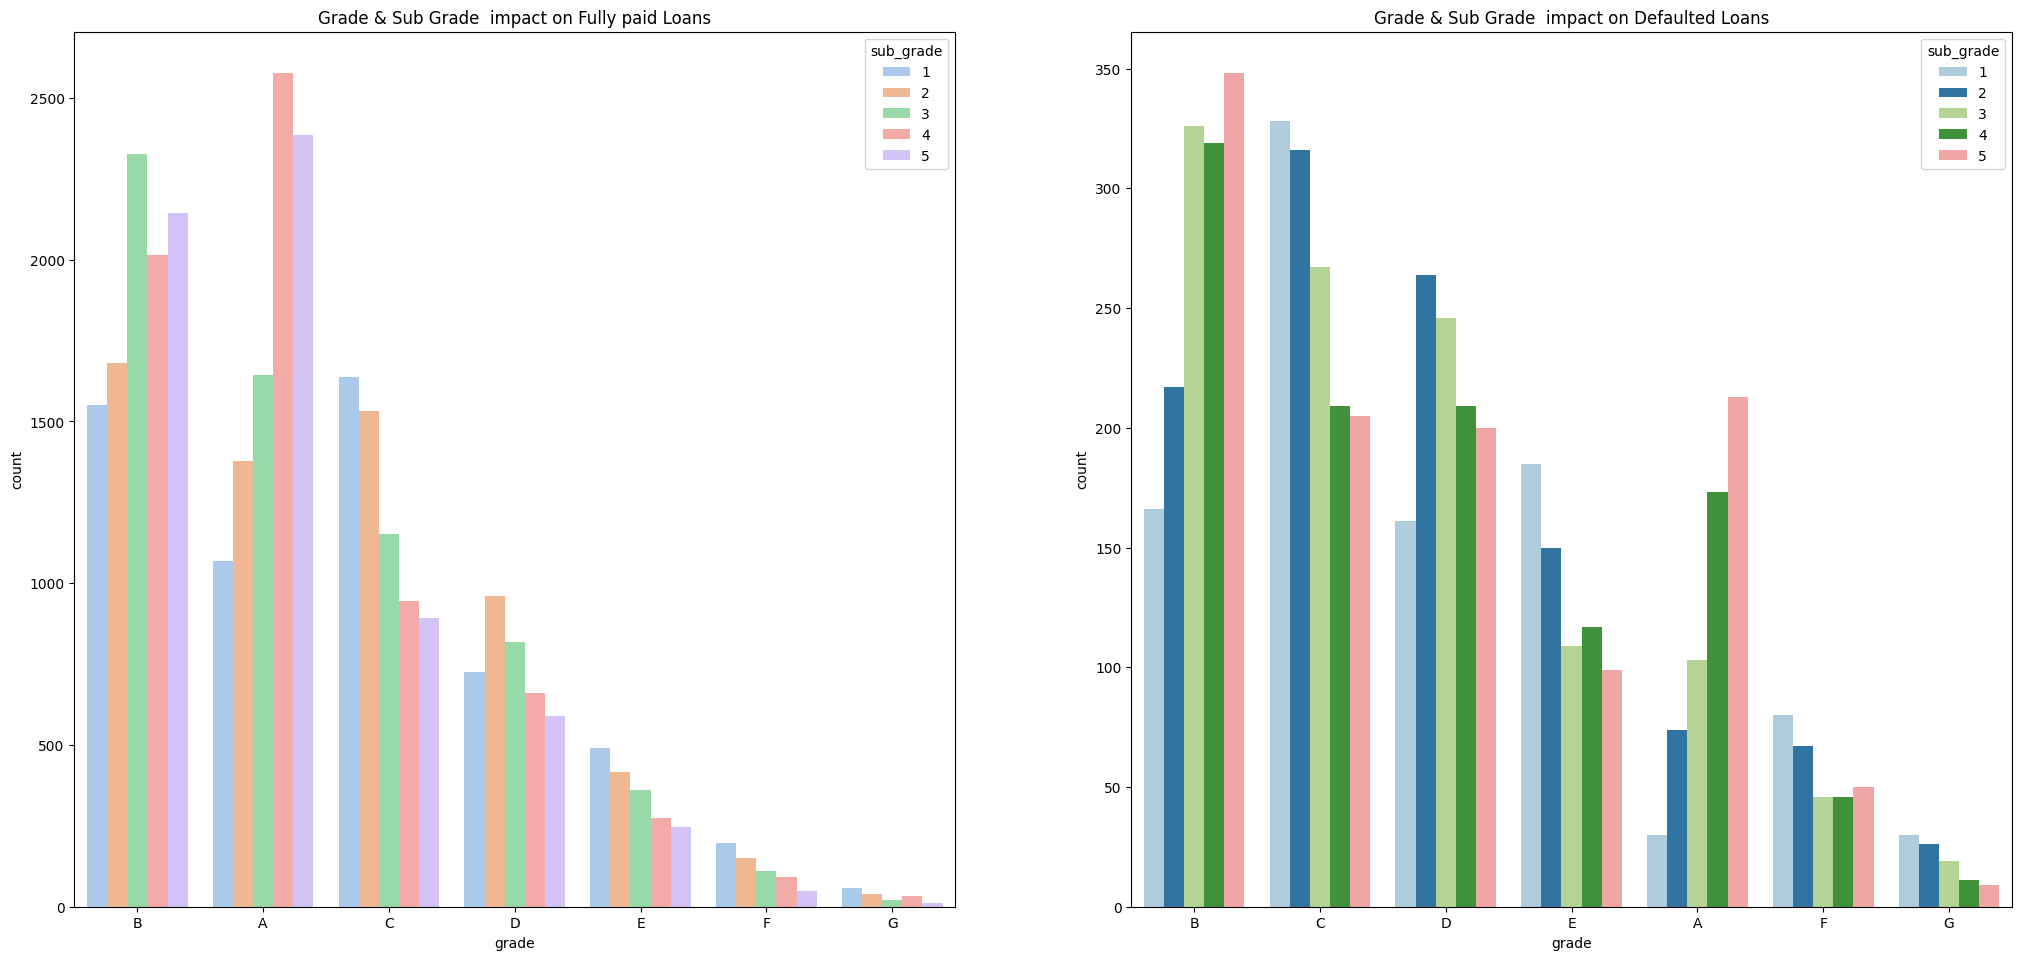

In [34]:
fig, ax = plt.subplots(figsize = (25,25))

plt.subplot(221)
sns.countplot(x='grade', data=fully_paid_loan_df , order=fully_paid_loan_df.grade.value_counts().index , hue='sub_grade' ,palette='pastel')
plt.title('Grade & Sub Grade  impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='grade', data=charged_off_loan_df , hue='sub_grade', order=charged_off_loan_df.grade.value_counts().index ,palette='Paired')
plt.title('Grade & Sub Grade  impact on Defaulted Loans')

-  __Verification Status impact on loans__

Text(0.5, 1.0, 'Verification Status impact on Defaulted Loans')

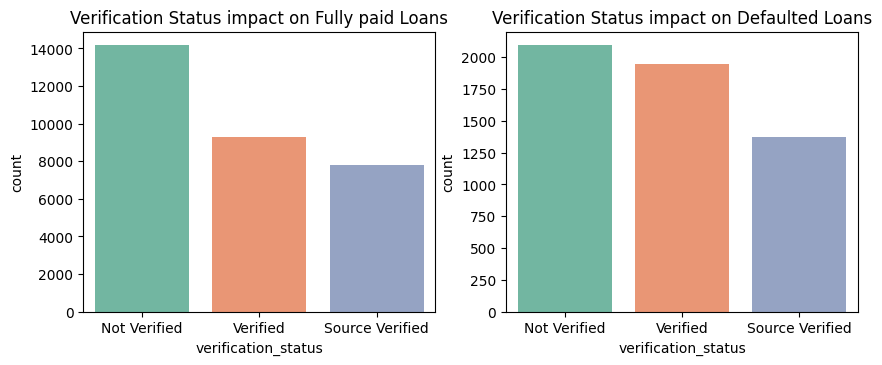

In [35]:
fig, ax = plt.subplots(figsize = (10,8))

plt.subplot(221)
sns.countplot(x='verification_status', data=fully_paid_loan_df , order=fully_paid_loan_df.verification_status.value_counts().index ,palette='Set2')
plt.title('Verification Status impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='verification_status', data=charged_off_loan_df , order=charged_off_loan_df.verification_status.value_counts().index ,palette='Set2')
plt.title('Verification Status impact on Defaulted Loans')

-  __Debt to Income impact on loans__

Text(0.5, 1.0, 'Debt to Income impact on Defaulted Loans')

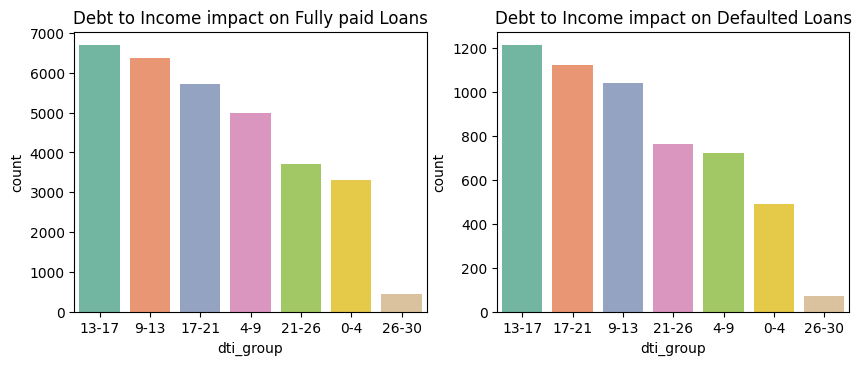

In [43]:
fig, ax = plt.subplots(figsize = (10,8))

plt.subplot(221)
sns.countplot(x='dti_group', data=fully_paid_loan_df , order=fully_paid_loan_df.dti_group.value_counts().index ,palette='Set2')
plt.title('Debt to Income impact on Fully paid Loans')

plt.subplot(222)
sns.countplot(x='dti_group', data=charged_off_loan_df , order=charged_off_loan_df.dti_group.value_counts().index ,palette='Set2')
plt.title('Debt to Income impact on Defaulted Loans')

In [45]:
final_loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,term_in_months,issue_mon,issue_year,installment_percentage_on_montly_Income,installment_per_group,int_rate_group,annual_inc_group,dti_group
0,5000,5000,4975.0,10.65,162.87,B,2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,36,Dec,2011,8.0,6-13%,10%-12%,17.5-31K,26-30
1,2500,2500,2500.0,15.27,59.83,C,4,0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,60,Dec,2011,2.0,0-6%,15%-16%,17.5-31K,0-4
2,2400,2400,2400.0,15.96,84.33,C,5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,36,Dec,2011,8.0,6-13%,15%-16%,2-17.5K,9-13
3,10000,10000,10000.0,13.49,339.31,C,1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,36,Dec,2011,8.0,6-13%,13%-15%,45-58K,17-21
5,5000,5000,5000.0,7.90,156.46,A,4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,36,Dec,2011,5.0,0-6%,7%-9%,31-45K,9-13


- ### **Summary / Observations on Defaulted Loans**
1. 10+ , <1 or No work experience Customers have mostly defaulted the loans.
2. Customers who are on rent house or mortaged house are more likely to default than who own a house.
3. Debt consolidation is highest factor for taking loans and then defaulting the loan. So while giving loan Approver have be mindful and check all neccesary parameters for approving the loan.
4. 30K-70K(this fig is derived from by analysing 31-45K, 45-58K, 58-72K groups) range annaual income customers are more likely to default loan.
5. 13-15% int rate loans are mostly defaulted customers. If we consolidate four buckets(13-15%, 15-16%, 10-12%, 12-13%) we can infer and say 10-16% int rate loans are more likely to default the loan.
6. Dec Month loans are most defaulted loans, Cusomers who take loan in Sep, Oct, Nov, Dec are more likely to default , may be they are taking loans to pay off other debts as they are nearing to year end.
7. Loan year pattern suggests us , year on year default loans are increasing and loan applications are increasing. At 2011 year more number of default loans occured. Financial Crisis / Recission or other global factors might be reason for that.
8. Though California customers took more no of loans and then defaulted. Florida Customers have defaulted more loans if we consider the ratio of loans taken and defaulted.
9. B5, C1 grade loans are most defaulted loans.
10. UnVerified loans(non BGV) loans are risky loans and defaulted loans. So verification about customer helps in reducing the risk.
11. most of the customers who apply for loan falls in 13-17 dti range and they are also more likely to default the loans.


- ### **Summary/Observations on Fully Paid Loans,  which would help in issuing new loans with less risk or less chances of defaulting loans.**
1. Loans can be given to Mid Work Experience customers.
2. credit card loan purpose customers are mindful about their credit score, so loan issuing to them would reduce risk of loan.
3. A grade loans can be approved with less risk.

### *We can infer more insights if we have more business context / knowledge*